In [8]:
def read_second_and_second_last_line(file_path):
    second_line = None
    second_last_line = None

    with open(file_path, 'rb') as f:
        # Read the second line
        f.readline()  # Skip the first line
        second_line = f.readline().decode('utf-8')  # Read the second line

        # Read the second-to-last line efficiently by seeking backwards
        f.seek(0, 2)  # Move to the end of the file
        position = f.tell() - 1

        lines = []
        while position >= 0:
            f.seek(position)
            char = f.read(1)
            if char == b'\n':
                line = f.readline().decode('utf-8')
                lines.append(line.strip())
                if len(lines) == 2:
                    break
                position -= len(line) + 1  # Adjust position to skip the current line
            else:
                position -= 1

        if len(lines) >= 2:
            second_last_line = lines[1]  # Second-to-last line is the second line in the list
        elif len(lines) == 1:
            second_last_line = lines[0]  # Handle case where file has only two lines

    return second_line.strip(), second_last_line.strip()

# Example usage
file_path = 'C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\BTC_USDT\\orderbook_changes_1711376131589.tsv'
second, last = read_second_and_second_last_line(file_path)
second_line_last_element = second.split('\t')[-1] if second else None
second_last_line_last_element = last.split('\t')[-1] if last else None

print(f"Second Line: {second_line_last_element}")
print(f"Last Line: {second_last_line_last_element}")
(int(second_last_line_last_element) - int(second_line_last_element)) / 1000

Second Line: 1711368931430
Last Line: 1711376131589


7200.159

In [14]:
import os
import pandas as pd

def get_last_elements_of_second_and_second_last_lines(file_path):
    """Extract the last elements of the second line and second-to-last line of a file."""
    second_line = None
    second_last_line = None

    with open(file_path, 'rb') as f:
        # Read the second line
        f.readline()  # Skip the first line
        second_line = f.readline().decode('utf-8').strip()  # Read and decode the second line

        # Read the second-to-last line efficiently by seeking backwards
        f.seek(0, 2)  # Move to the end of the file
        position = f.tell() - 1

        lines = []
        while position >= 0:
            f.seek(position)
            char = f.read(1)
            if char == b'\n':
                line = f.readline().decode('utf-8').strip()
                lines.append(line)
                if len(lines) == 2:
                    break
                position -= len(line) + 1  # Move the position back by the line length
            else:
                position -= 1

        if len(lines) >= 2:
            second_last_line = lines[1]
        elif len(lines) == 1:
            second_last_line = lines[0]  # Handle case where file has only two lines

    # Extract the last element from each line (split by tabs)
    second_line_last_element = second_line.split('\t')[-1] if second_line else None
    second_last_line_last_element = second_last_line.split('\t')[-1] if second_last_line else None

    return second_line_last_element, second_last_line_last_element

def process_files_in_subfolders(base_path):
    """Traverse subfolders, process files, and return a DataFrame with differences."""
    data = []

    # Walk through the base directory
    for root, dirs, files in os.walk(base_path):
        for file in files:
            file_path = os.path.join(root, file)
            subfolder_name = os.path.basename(root)

            # Extract last elements from second and second-to-last lines
            second_last_element, second_last_line_element = get_last_elements_of_second_and_second_last_lines(file_path)
            
            # Convert to integers and compute the difference if both elements are present
            try:
                if second_last_element is not None and second_last_line_element is not None:
                    diff = (int(second_last_line_element) - int(second_last_element)) / 1000 / 3600
                    data.append({'Subfolder': subfolder_name, 'Difference': diff})
            except ValueError:
                # Skip files where conversion to integer fails
                print(f"Skipping file due to conversion error: {file_path}")

    # Create a DataFrame
    df = pd.DataFrame(data)
    return df

# Specify the path
base_path = r"C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\"

# Process the files and generate the DataFrame
df = process_files_in_subfolders(base_path)

# Display the DataFrame
df = df.groupby('Subfolder').sum().reset_index()
df

Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\BTC_USD\best_densities_full.csv
Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\BTC_USD\orderbook_changes_1706072225472.tsv
Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\BTC_USDT\best_densities_full.csv
Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\ETH_BTC\best_densities_full.csv
Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\ETH_USD\best_densities_full.csv
Skipping file due to conversion error: C:\\Users\\Admin\\OneDrive - Politecnico di Milano\\phd\\dati\\hawkes\\orderbook_changes\\ETH_USD\orderbook_changes_1712091111010.tsv
Skipping 

,Subfolder,Difference
0,BTC_USD,185.396047
1,BTC_USDT,83.807867
2,ETH_BTC,77.285383
3,ETH_USD,84.945911
4,ETH_USDT,80.091459


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200')])

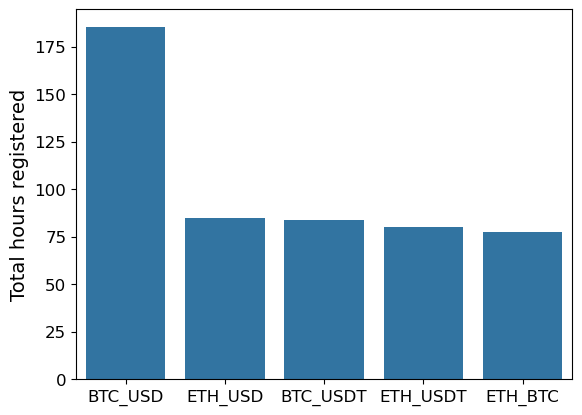

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Subfolder', y='Difference', data=df.sort_values('Difference', ascending=False))
plt.xlabel('')
plt.ylabel('Total hours registered', fontsize=14)
# increase the font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
